# Anonymized Data From E-Cell DTU's 2019 Recruitment

This notebook contains a very basic analysis of E-Cell DTU's data collected from the list of responses for their recruitment process.

## Basic Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("e-cell-responses-data.csv")

## Inspecting and Cleaning the Data

In [3]:
pd.concat([df.head(), df.tail()])

,Timestamp,Branch,Roll Number
0,8/8/2019 12:25:59,option 1,2k19/a3
1,8/8/2019 12:26:53,ece,2k19/b7
2,8/8/2019 12:27:04,se,2k19/a4
3,8/8/2019 12:29:07,mathematics and computing,2k19/b6
4,8/8/2019 12:32:14,coe,2k19/a1
344,8/9/2019 11:44:00,pie,2k19/b11
345,8/9/2019 12:42:17,coe,2k19/b1
346,8/9/2019 14:25:57,electrical engineering (ee),2k19/a8
347,8/9/2019 14:26:41,ee,2k19/a8
348,8/9/2019 16:05:40,me,2k19/me


### Checking For Null Values

In [4]:
df.isna().any()

Timestamp      False
Branch         False
Roll Number     True
dtype: bool

In [5]:
df.dropna(inplace= True)

### Cleaning Branch Names

In [6]:
df["Branch"] = df["Branch"].apply(lambda x: x.strip().lower())
df["Branch"].unique()

array(['option 1', 'ece', 'se', 'mathematics and computing', 'coe', 'ee',
       'it', 'mce', 'ep', 'biotechnology', 'me', 'pie', 'ene',
       'mechanical', 'bt (bio technology)', 'b.des', 'ce', 'bba', 'bt',
       'pct', 'civil engineering (ce)', 'electrical', 'mam', 'cod',
       'b. design', 'electrical engineering (ee)'], dtype=object)

In [7]:
stream_mapping = {
    "option 1": "coe",
    "mathematics and computing": "mce",
    "biotechnology": "bt",
    "mechanical": "me",
    "bt (bio technology)": "bt",
    "b.des": "b. des",
    "civil engineering (ce)": "ce",
    "electrical": "ee",
    "cod": "coe",
    "coe pronounce as ''koi''": "coe",
    "b. design": "b. des",
    "electrical engineering (ee)": "ee"
}

In [8]:
df["Branch"] = df["Branch"].replace(stream_mapping)
df["Branch"].unique()

array(['coe', 'ece', 'se', 'mce', 'ee', 'it', 'ep', 'bt', 'me', 'pie',
       'ene', 'b. des', 'ce', 'bba', 'pct', 'mam'], dtype=object)

### Separating and Cleaning Roll Numbers

The last identifier of the roll number has been removed.

In [9]:
df["Roll Number"] = df["Roll Number"].apply(lambda x: x.lower().strip().lstrip("dtu/"))
t_r = df["Roll Number"].apply(lambda x: x.split("/"))

In [10]:
df.drop(index= t_r[t_r.apply(lambda x: len(x) != 2)].index, inplace= True)
t_r.drop(index= t_r[t_r.apply(lambda x: len(x) != 2)].index, inplace= True)
t_r = np.array(t_r.values.tolist())

In [11]:
df["Year"] = t_r[:, 0]
df["Batch"] = t_r[:, 1]

In [12]:
def check_batch(x):
    if x[1].isdigit():
        return True
    else:
        return False

In [13]:
df = df[df["Batch"].apply(check_batch)]
df.head()

,Timestamp,Branch,Roll Number,Year,Batch
0,8/8/2019 12:25:59,coe,2k19/a3,2k19,a3
1,8/8/2019 12:26:53,ece,2k19/b7,2k19,b7
2,8/8/2019 12:27:04,se,2k19/a4,2k19,a4
3,8/8/2019 12:29:07,mce,2k19/b6,2k19,b6
4,8/8/2019 12:32:14,coe,2k19/a1,2k19,a1


In [14]:
df.Year.unique()

array(['2k19', '2k10', '- 2k19', '2k19 '], dtype=object)

In [15]:
df["Year"] = '2k19'

## Plotting basic bar charts

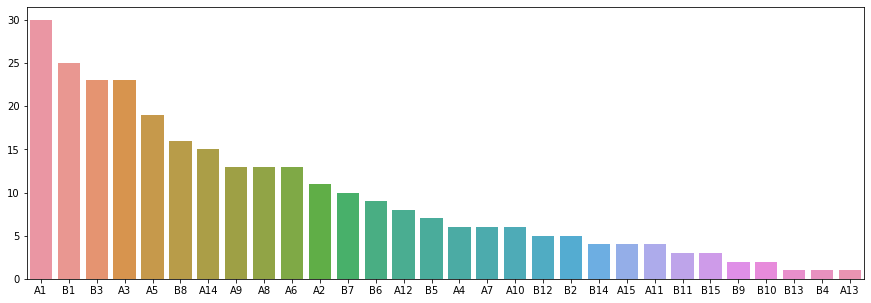

In [16]:
a = df.Batch.value_counts()
a = a.sort_values(ascending= False)
plt.figure(figsize=(15, 5))
sns.barplot(x= [x.upper() for x in a.index], y= a.values)
plt.show()

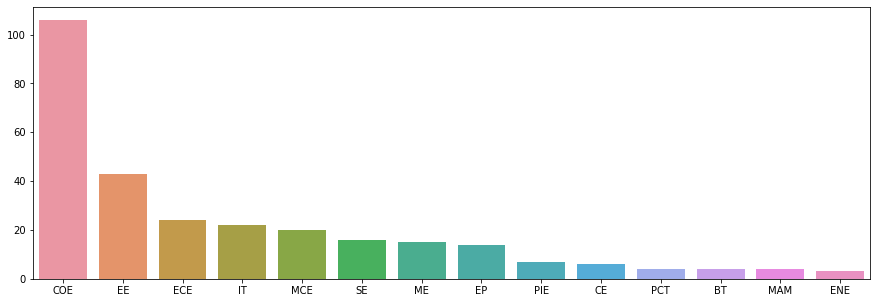

In [17]:
a = df.Branch.value_counts()
a = a.sort_values(ascending= False)
plt.figure(figsize=(15, 5))
sns.barplot(x= [x.upper() for x in a.index], y= a.values)
plt.show()

## Future Ideas

* Get number of students branch-wise from JAC and see percentage of students who joined from each stream.
* Time series analysis to see the most active time for submitting responses.
* And of course, anything else you can think of!